This notebook explores and models graduate admissions data to help Global Tech University (GTU) identify high-probability admit candidates and allocate scholarships effectively.

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('/content/drive/MyDrive/Atom Camp/Admission_Predict.csv')



We import the dataset using Pandas. The file contains historical admissions data including academic scores, ratings, and research experience.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [19]:
df.describe(
)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Data Summary

We check the dataset structure and generate statistical summaries to understand data types, missing values, and value ranges. This helps identify cleaning or preprocessing needs.


In [20]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df["SOP"].value_counts() # to check if SOP is continous or categorical--- It is categorical


,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [22]:
df["LOR "].value_counts() #This one also has less than 10 numbers--- Hence, it is categorical

,count
LOR,
3.0,85
4.0,77
3.5,73
4.5,45
2.5,39
2.0,38
5.0,35
1.5,7
1.0,1


In [23]:
df["Research"].value_counts() #Binary

,count
Research,
1,219
0,181


### Feature Inspection

We inspect `SOP`, `LOR`, and `Research`:
- SOP & LOR: Appear to be on a 1–5 scale (likely ordinal categories).
- Research: Binary variable (0 = no experience, 1 = research experience).


In [24]:
# dropping the serial no column, as it is unnecessary and plays no role in forecasting
df.drop(["Serial No."], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [25]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Data Quality Checks

Before modeling, we ensure the dataset has no issues that could bias the model.

- **Missing values**: We confirm there are no null values.
- **Duplicates**: Checked to avoid repeated records.
- **Outliers**: Box plots are used to visually detect outliers in numerical features.


In [27]:
#checking if there are any missing values
df.isnull().sum()    # no missing values


,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [28]:
#Now checking for duplicates
df.duplicated().sum()

np.int64(0)

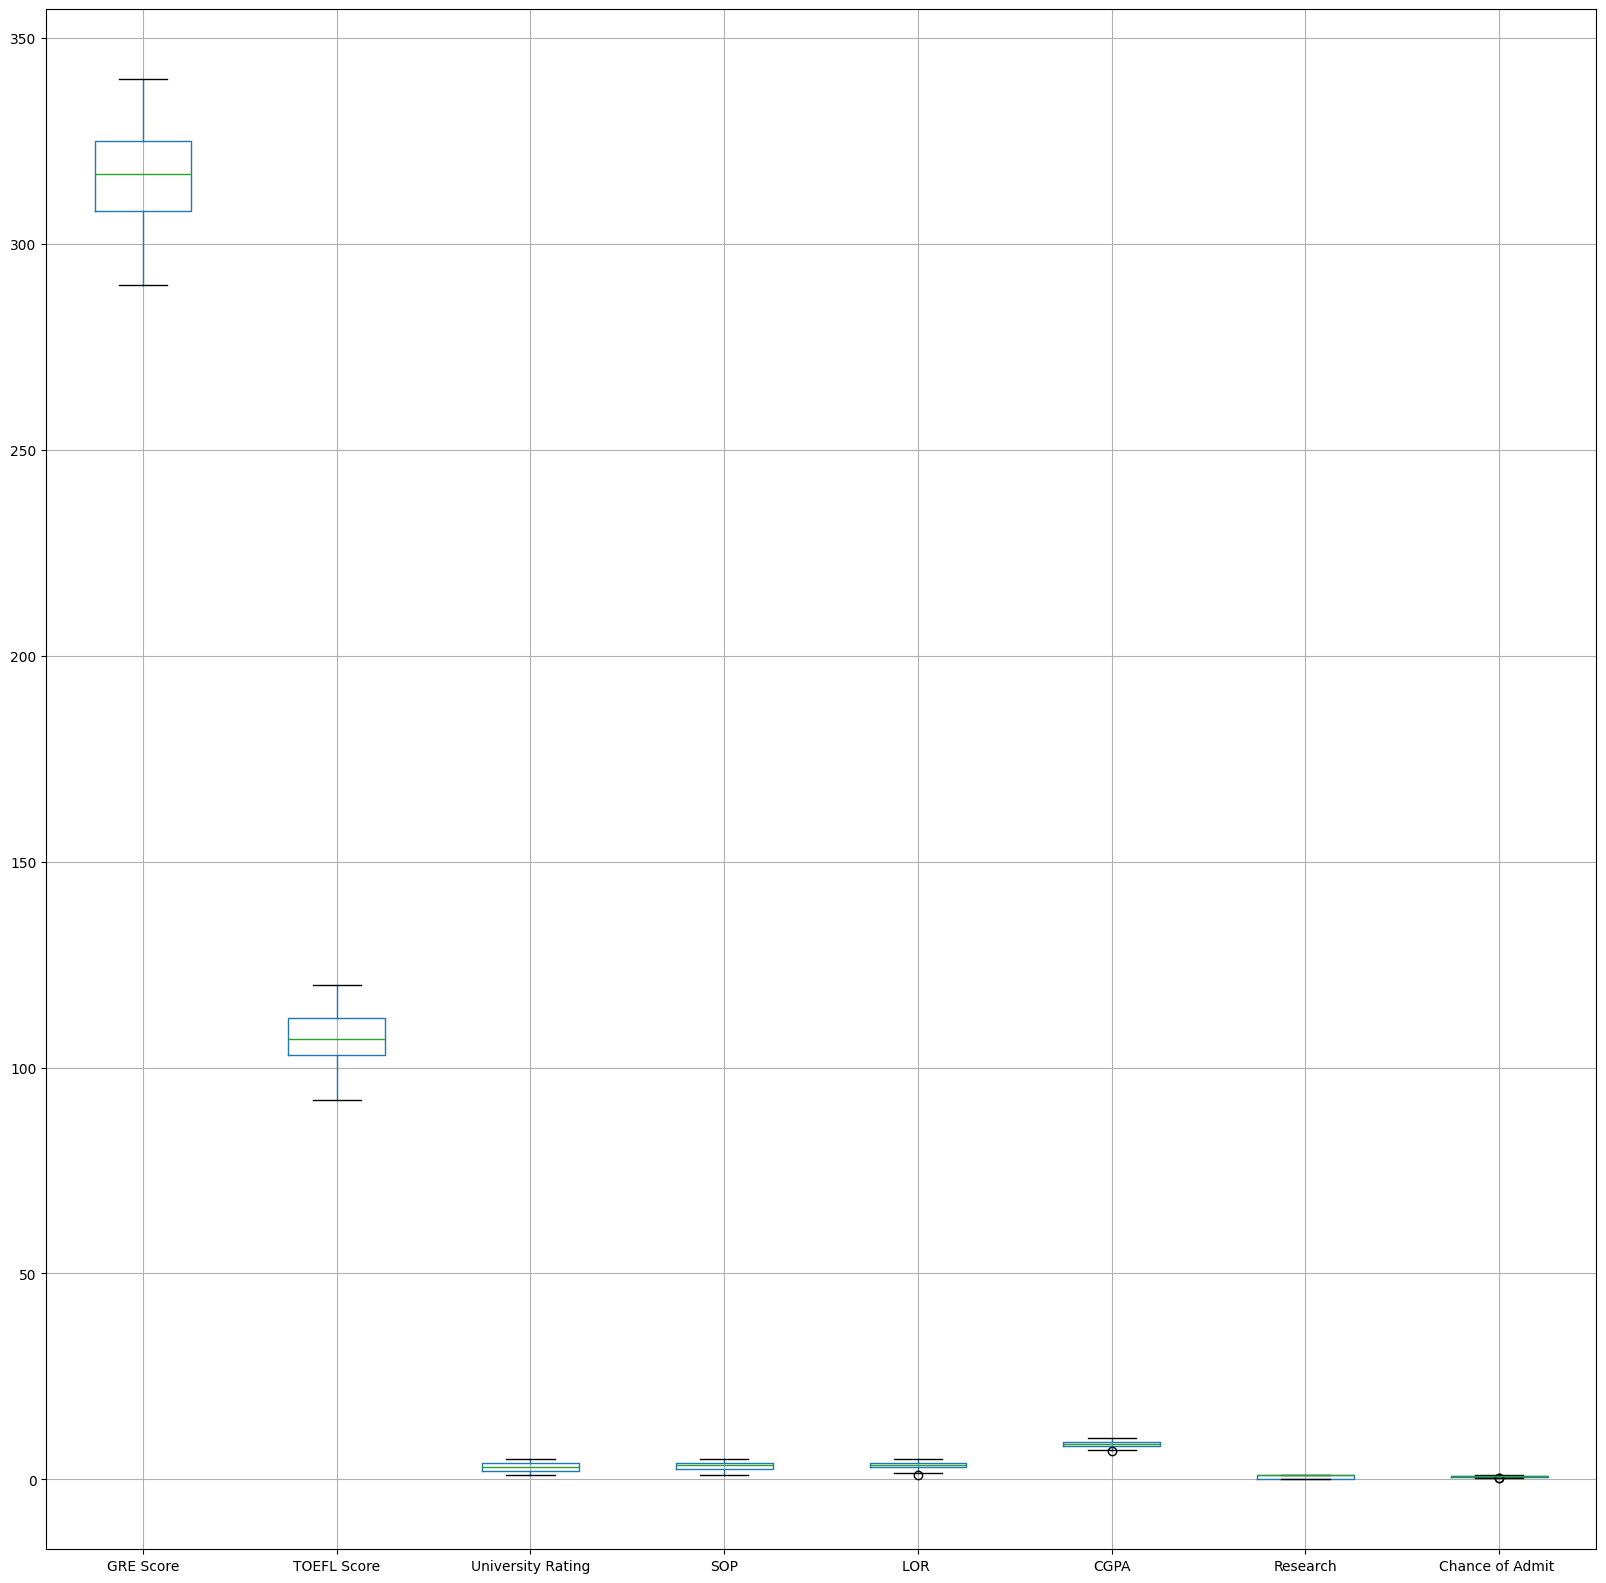

In [30]:
#checking for outliers in the given data set
df.boxplot(figsize=(20,20))
plt.show()

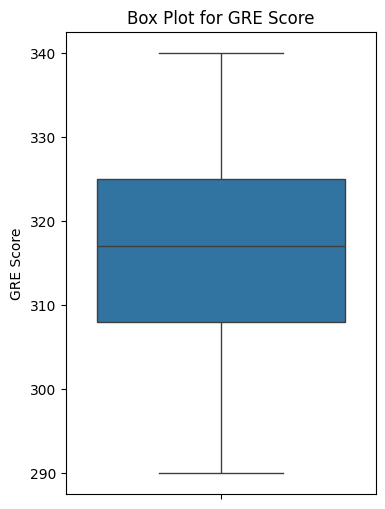

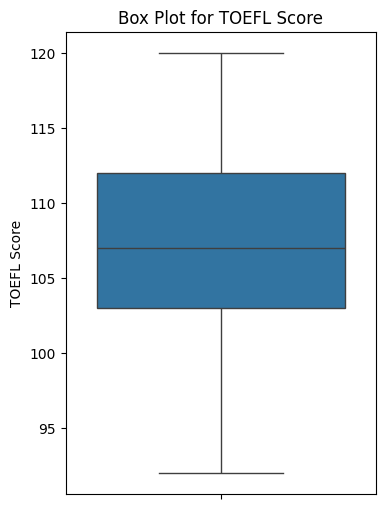

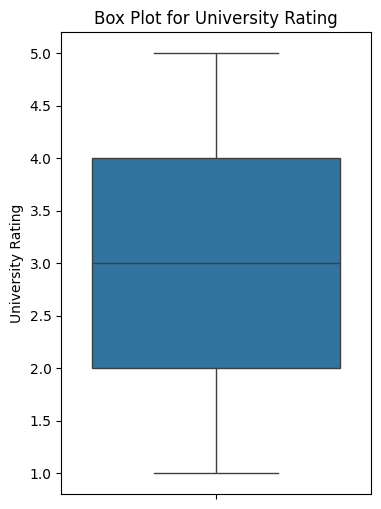

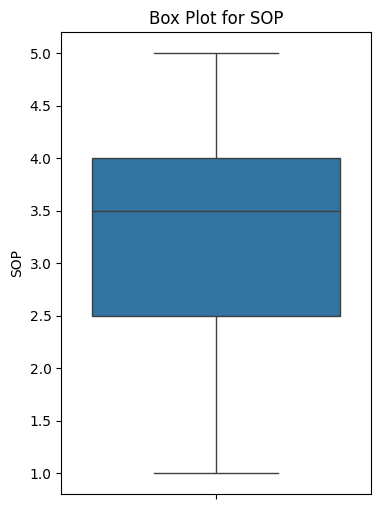

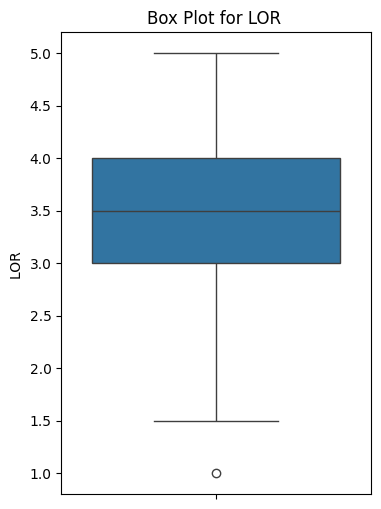

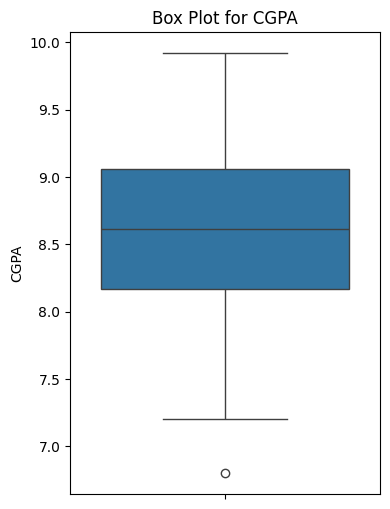

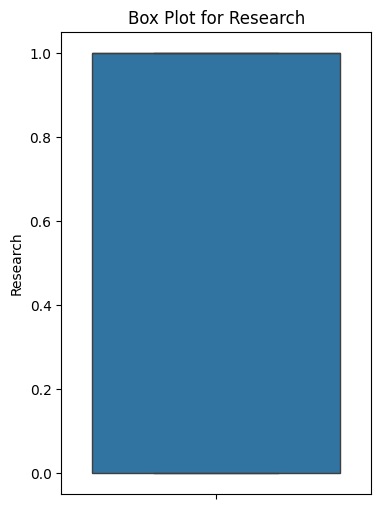

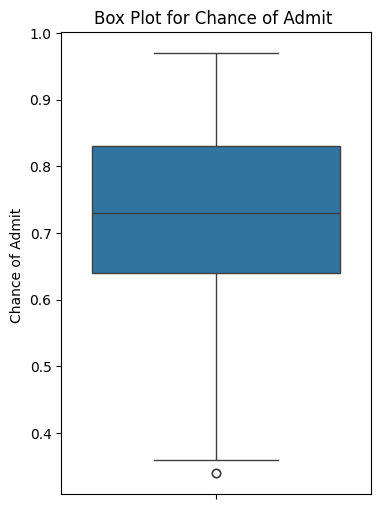

In [31]:
for col in df.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

In [32]:
#check row with less than 7 cgpa
df[df["CGPA"] < 7]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.8,1,0.36


In [34]:
# SOP or LOR are categorical
#sop 1-5
#lor 1-5
df["SOP"].unique()
#min -1
#max-5

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [35]:
# data inconsistencies in Categorical columns
print(df["Research"].unique())
print(df["University Rating"].unique())

[1 0]
[4 3 2 5 1]


## Visual Exploratory Data Analysis

We analyze the relationships between each feature and the target (`Chance of Admit`).

- **Histograms** show the overall distribution.
- **Scatter plots** help assess linear relationships.
- **Heatmap** reveals correlations between features.


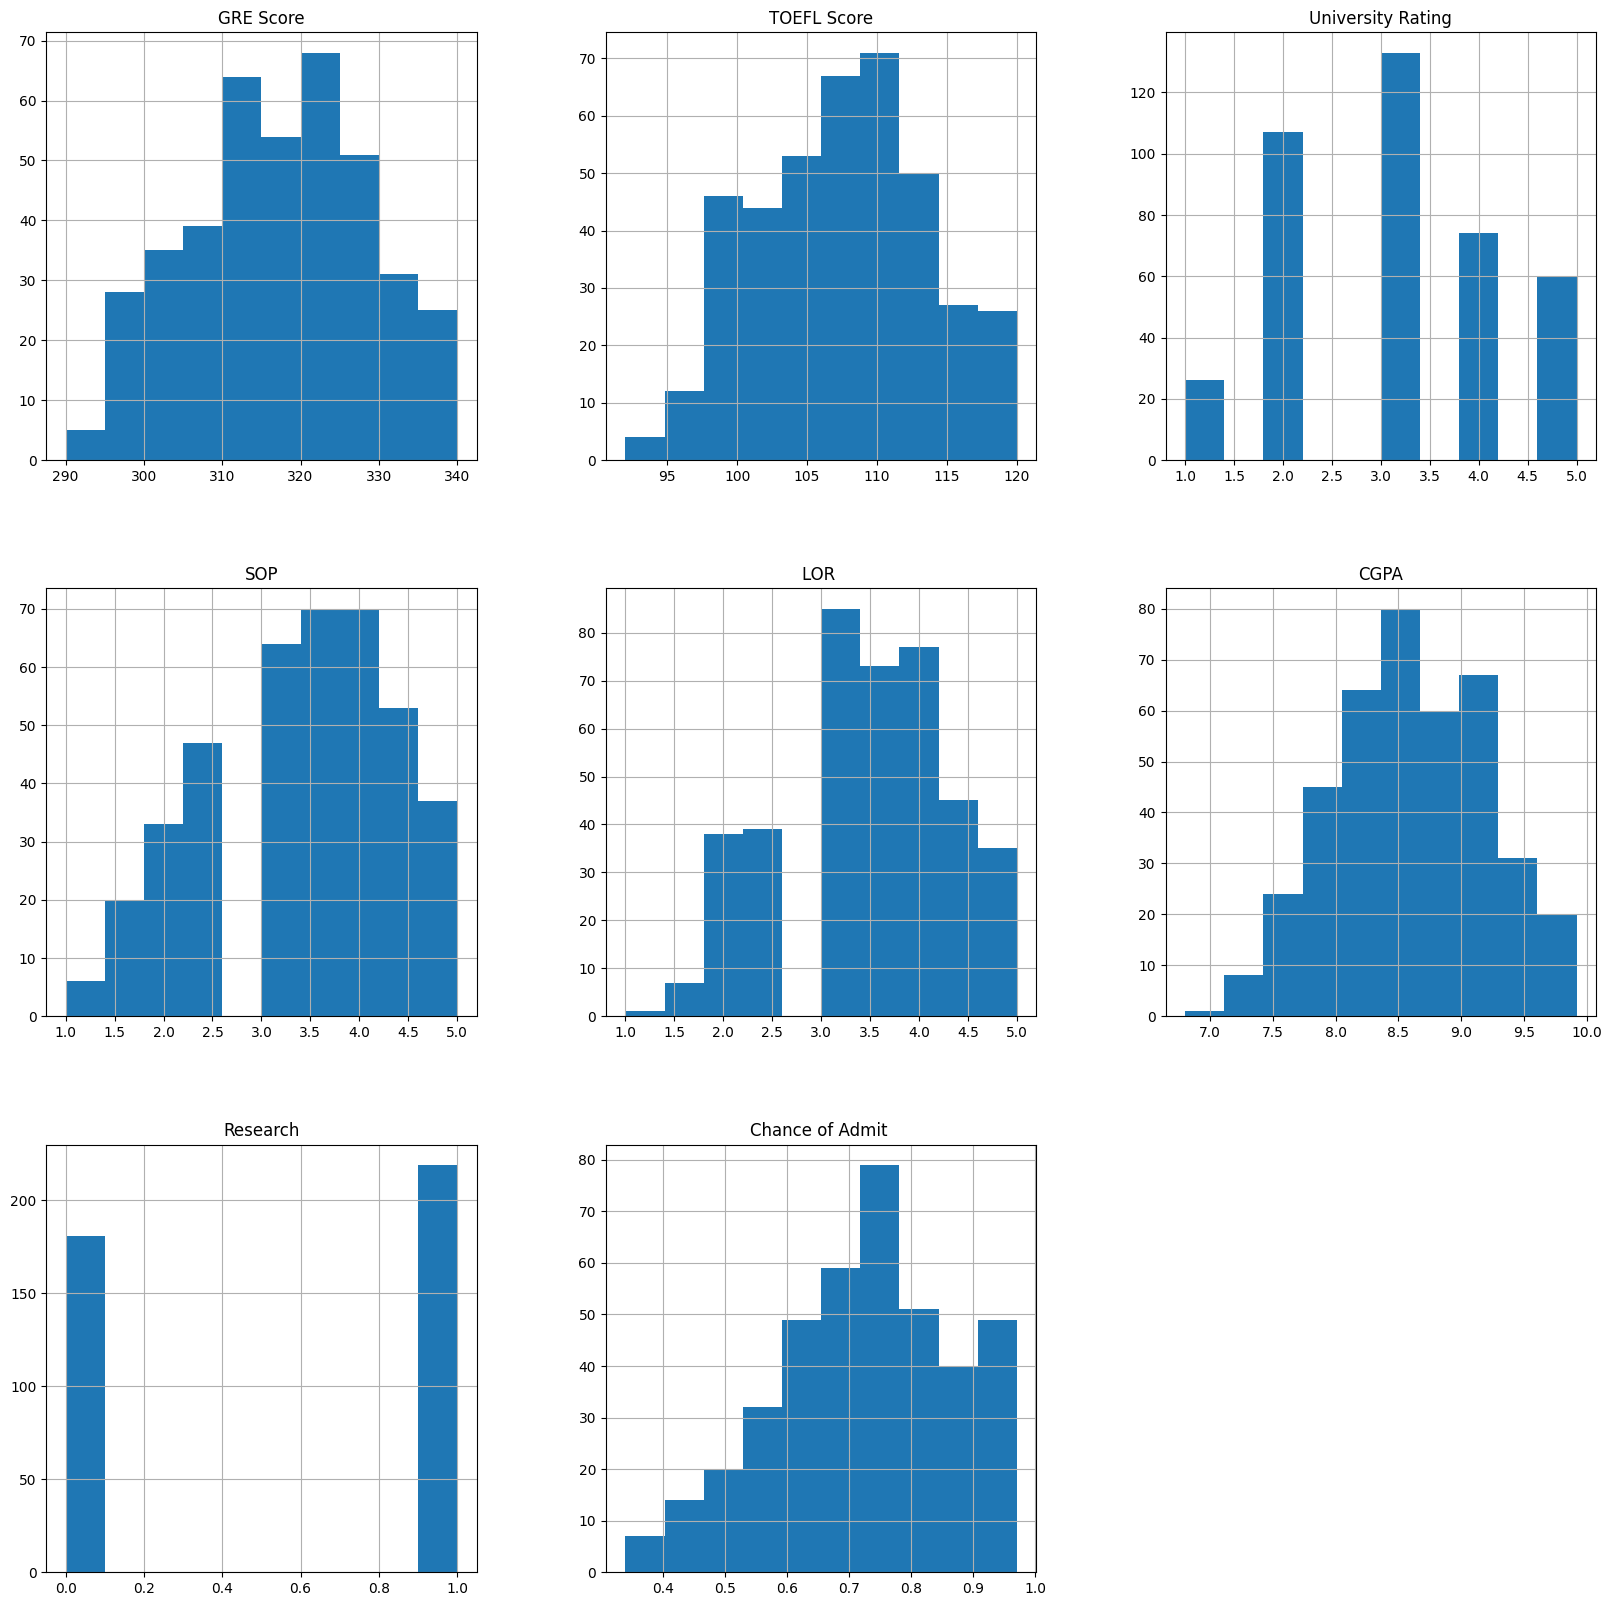

In [36]:
# distribution of numerical variable
df.hist(figsize=(20,20))
plt.show()

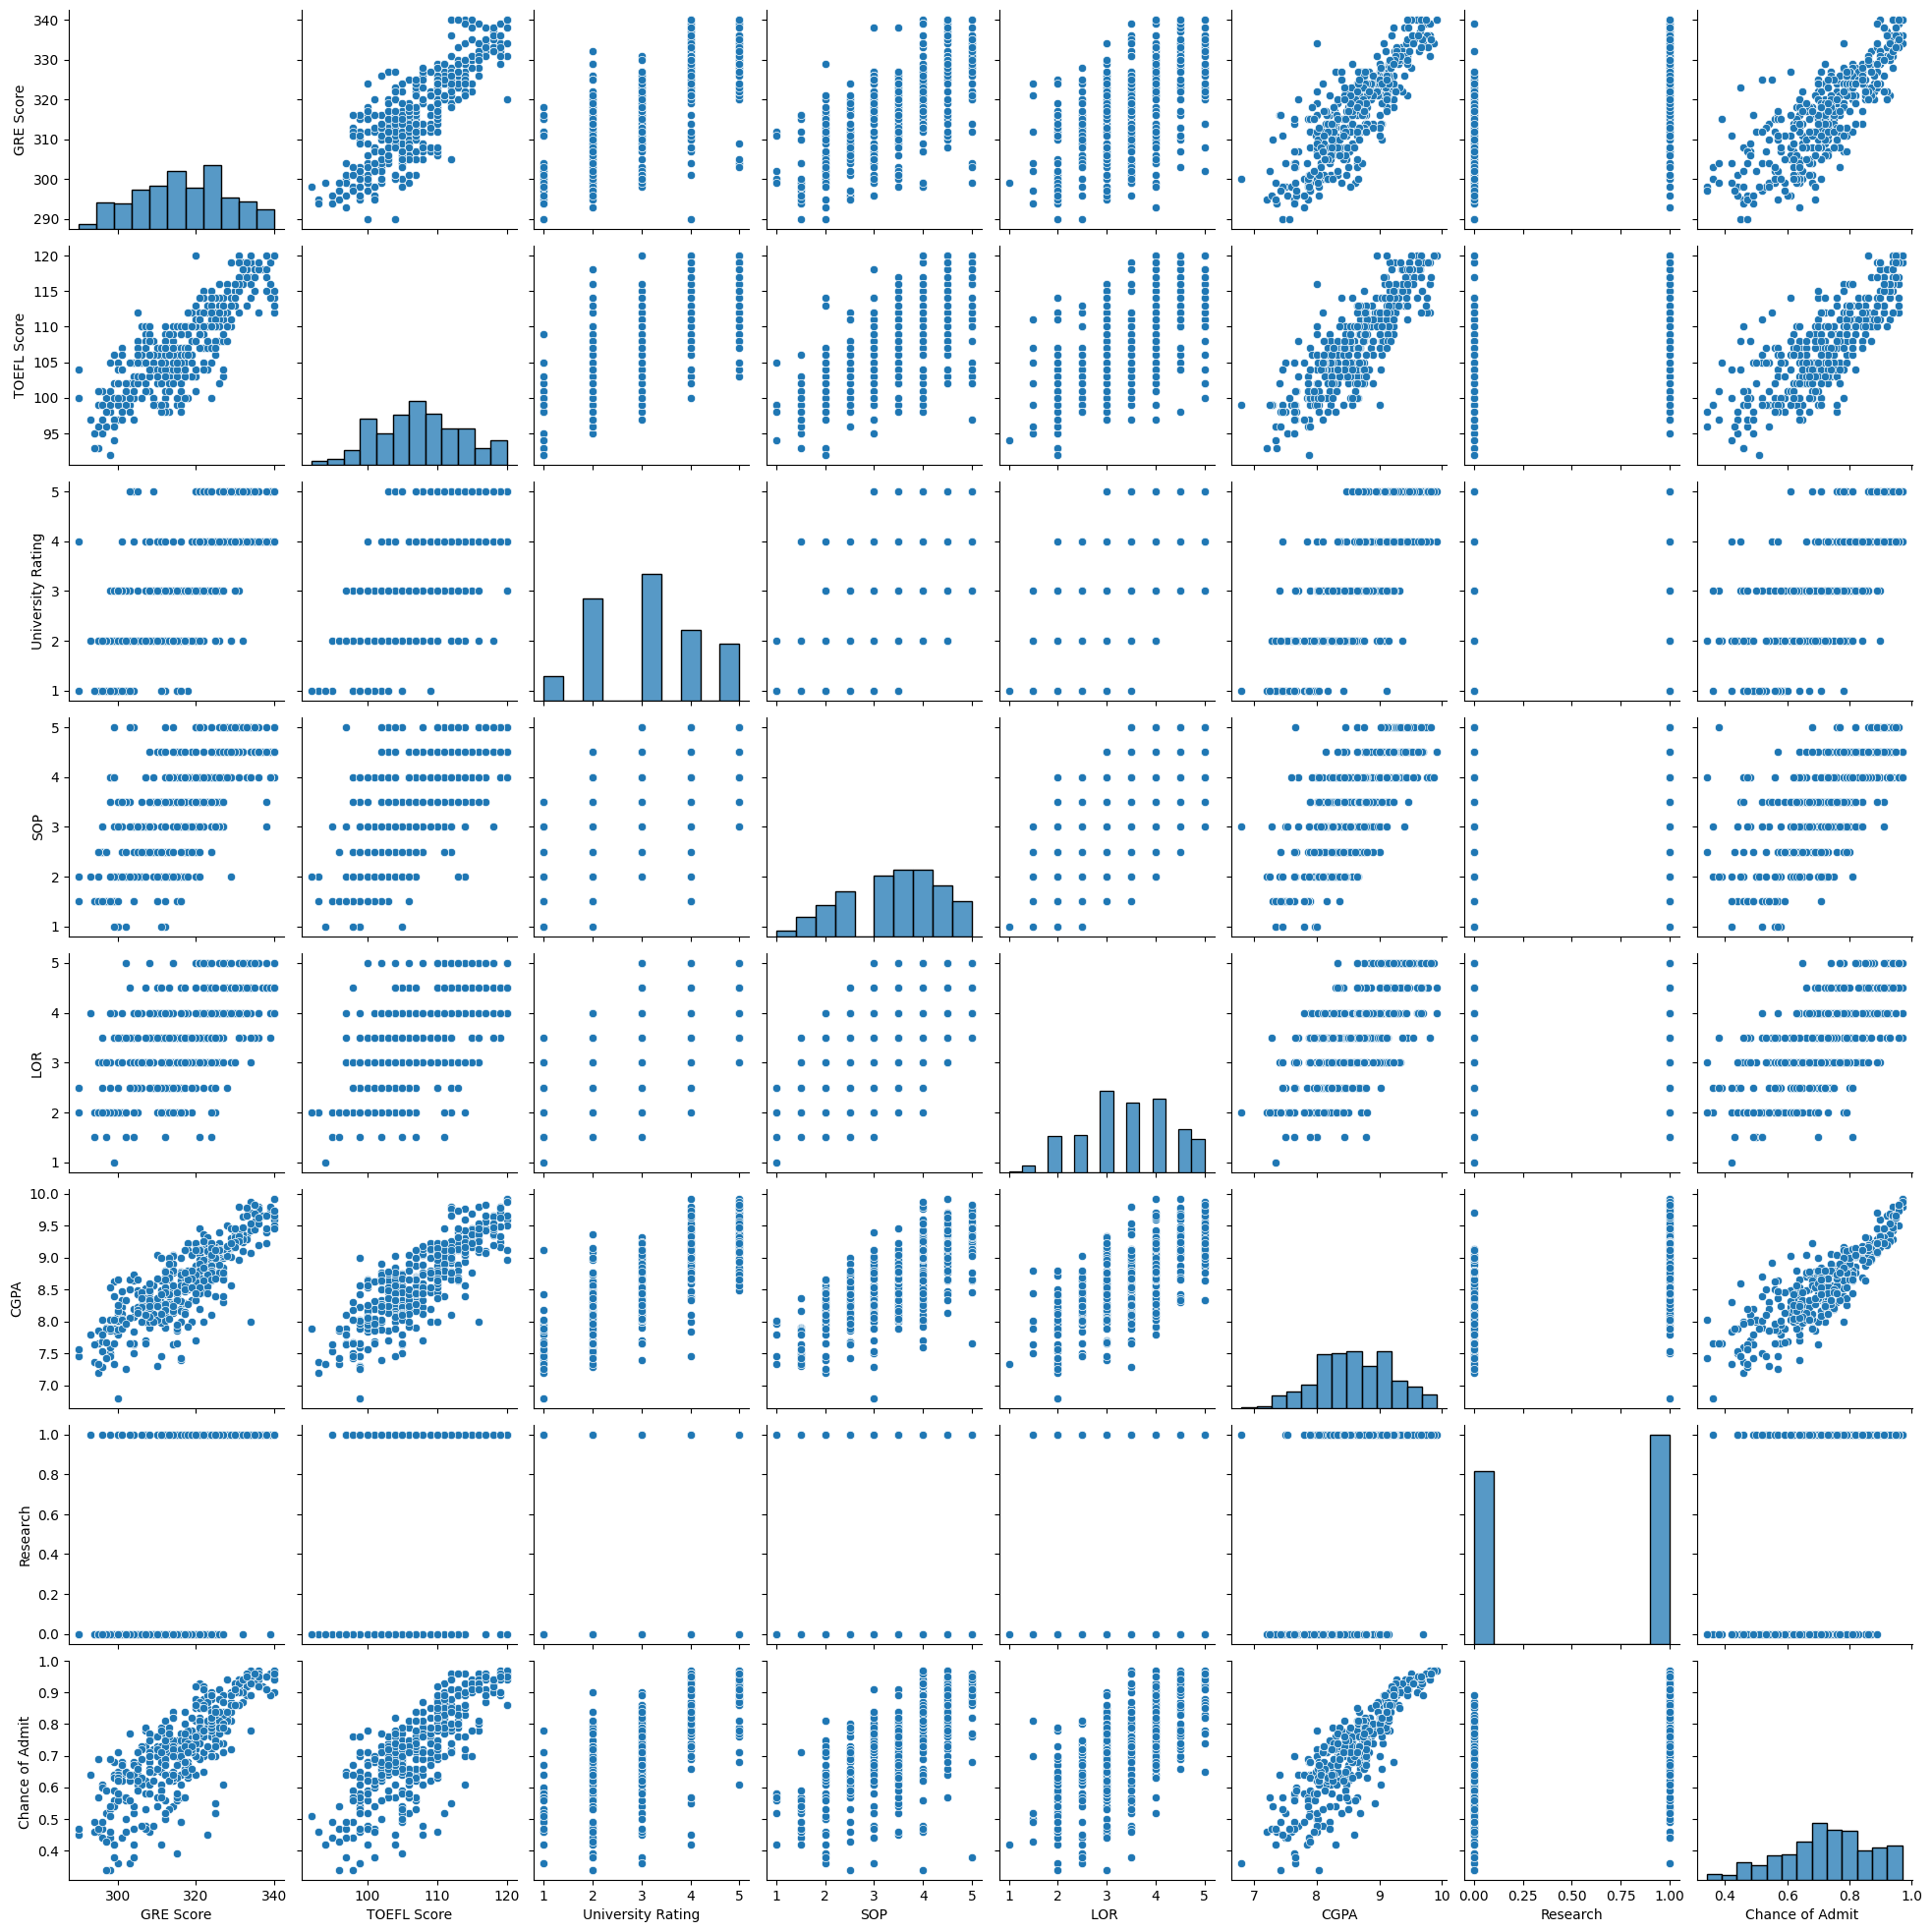

In [37]:
# To check linearity with chances of admission
sns.pairplot(df)
plt.show()

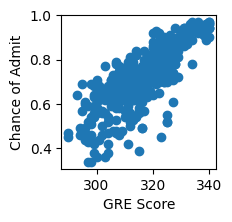

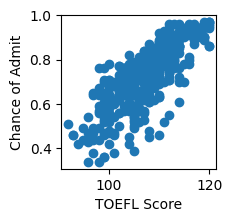

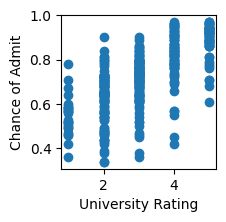

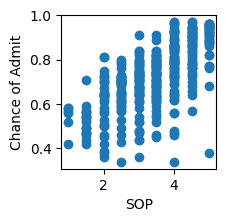

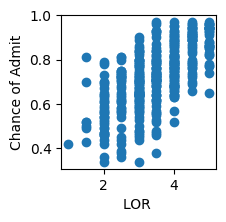

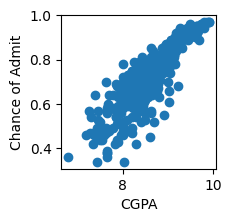

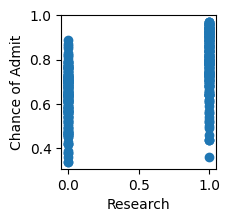

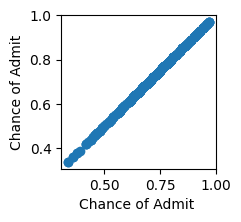

In [39]:
# Makin scatter plot of chances of admission with cont variable
for a in df.columns:
  plt.figure(figsize=(2,2))
  plt.scatter(df[a], df["Chance of Admit "])
  plt.xlabel(a)
  plt.ylabel("Chance of Admit")
  plt.show()

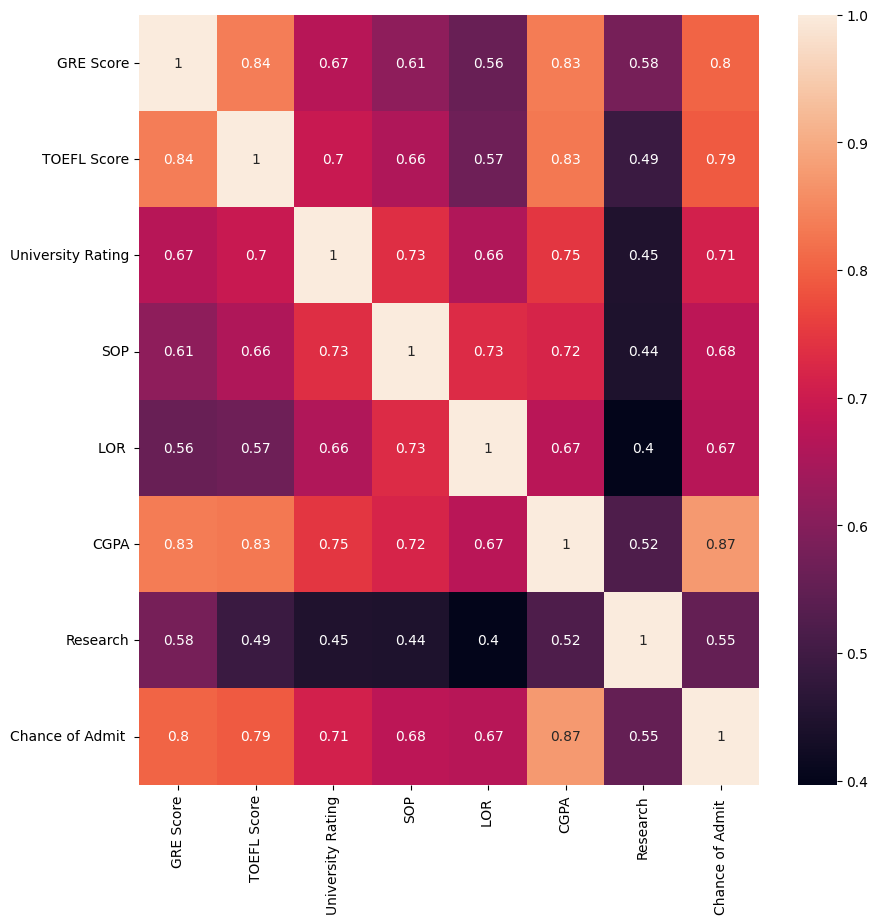

In [41]:
#Exploring the heat map of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

## Multicollinearity Detected

We observe that GRE, TOEFL, and CGPA are highly correlated with each other and the target variable. This can distort the Linear Regression model. Therefore, we will later consider tree-based models (Decision Tree and Random Forest) that are more robust to multicollinearity.


In [40]:
# there is multi colinearity of GRE scores and Toefl Scores with chances of admission

In [42]:
# CGPA, GRE Scores and TOEFL Scores are highly corelated with o/p, many columns highlhy multicolinear!Which indicates that
# Linear regression is no longer advisable, we should rather look for DT and RF


In [43]:
# scaling of all data except chance of admission
#normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        , 0.92063492])

In [46]:
# all the data is between 0 -1

In [44]:
#convert the response to df
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


## Feature Scaling

We apply both MinMaxScaler and StandardScaler to normalize the dataset.

- **MinMaxScaler** rescales all features to the range [0, 1].
- **StandardScaler** centers data around 0 with unit variance.
- Scaling is important for distance-based models and improves model convergence.


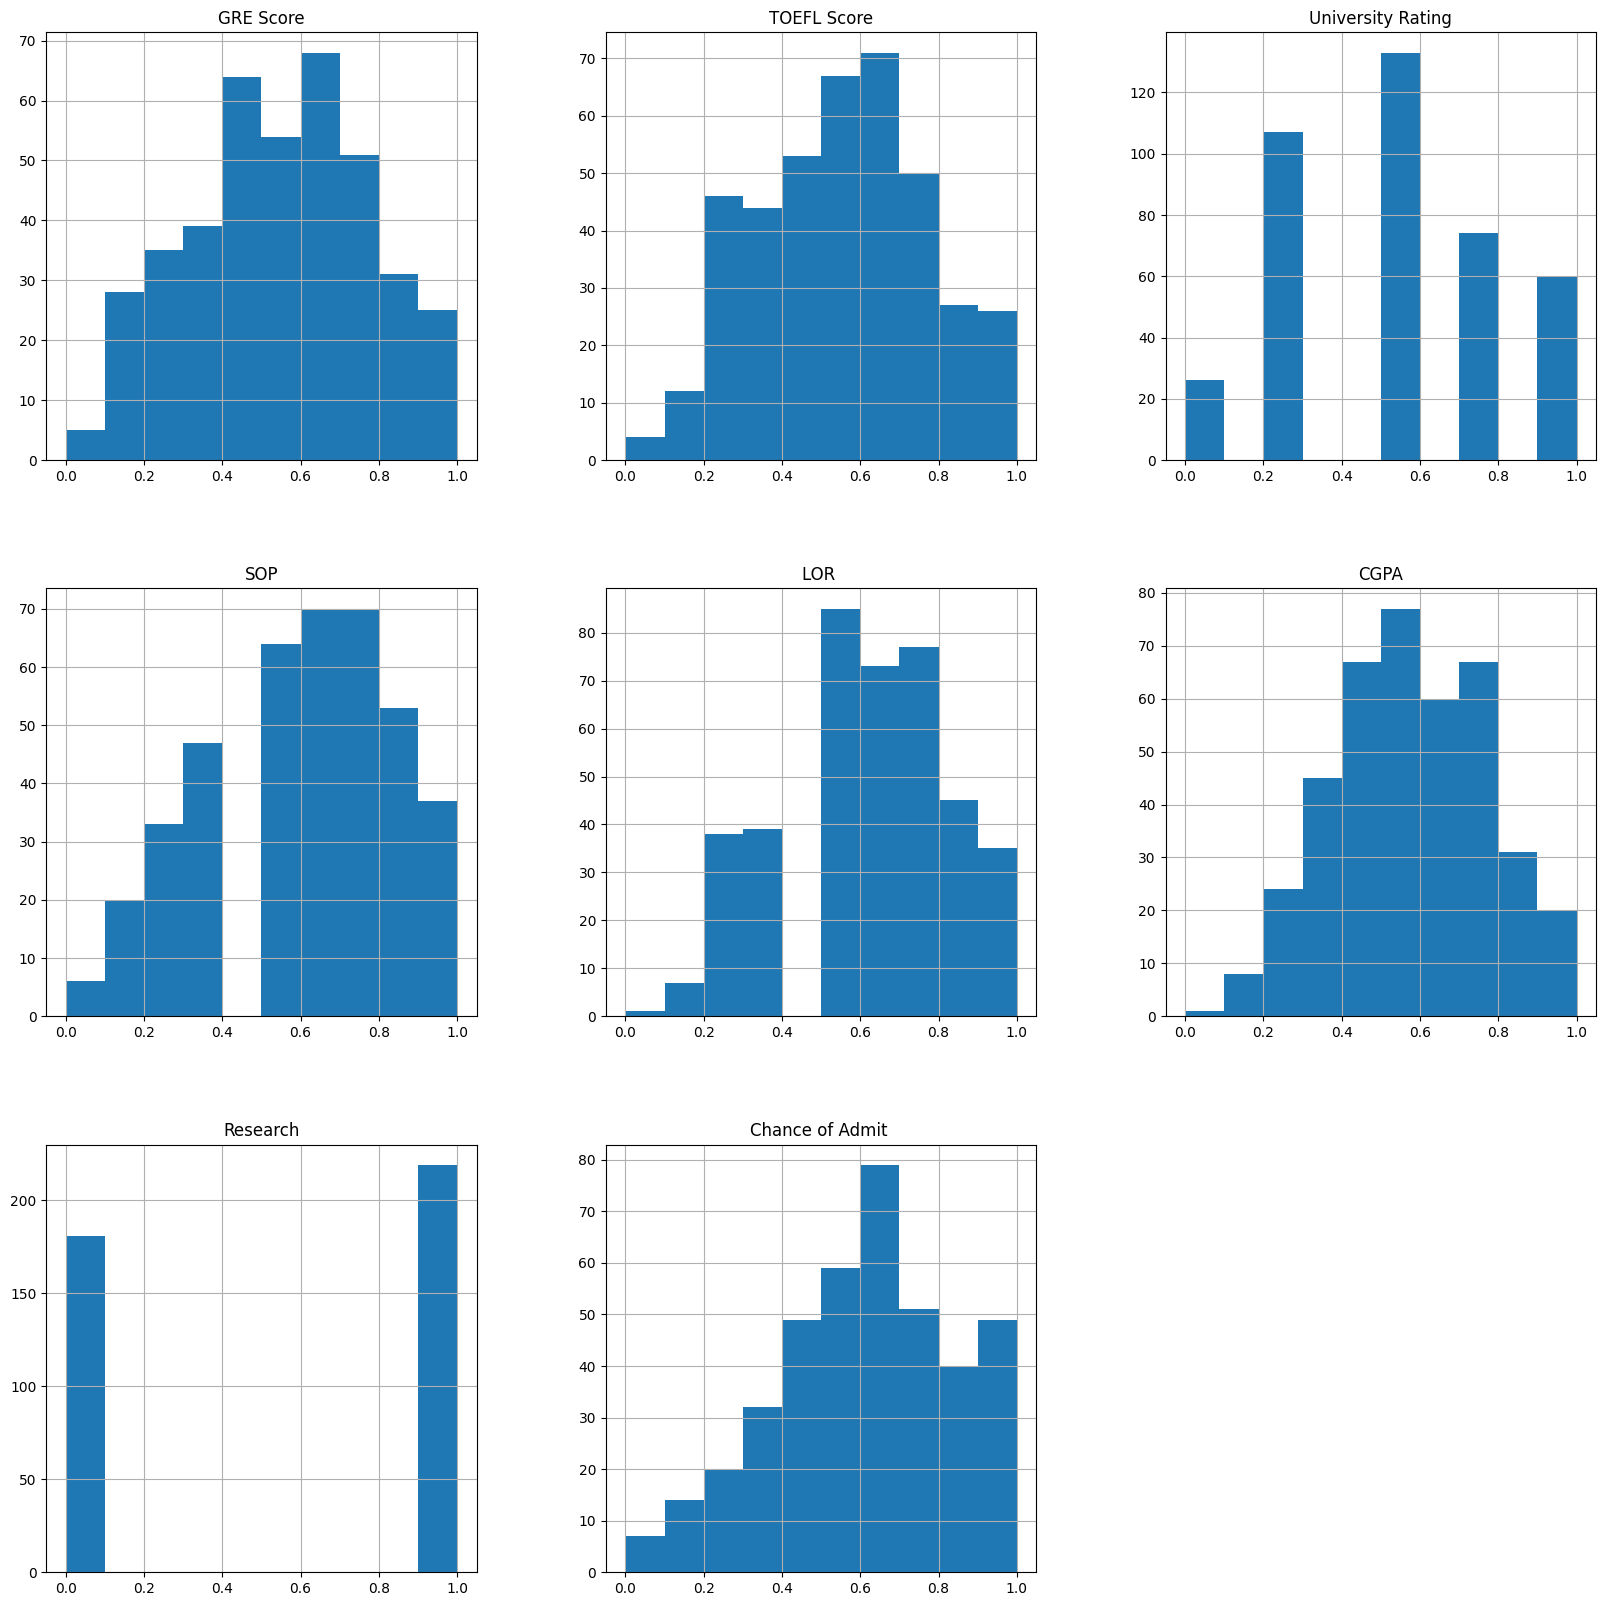

In [47]:
#historgram of scaled data , all histograms have same scale
df_scaled.hist(figsize=(20,20))
plt.show()

In [48]:
#z score normalisation/ standardisation--- shape of the data -- sclae data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled

StandardScaler()

In [49]:
df_scaled

StandardScaler()

## Linear Regression Model

We fit a simple linear regression model to understand baseline predictive performance.

- `X`: All features excluding the target.
- `y`: Target variable (`Chance of Admit`).
- We reshape `y` to match the expected input shape.


In [50]:
# Sklearn library
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [51]:
print(df.CGPA.values.shape)
print(df["Chance of Admit "].values.shape)

# Reshape
x = df.drop(["Chance of Admit "], axis=1)
print("Before resphape:\nX:", x.shape)
y = df["Chance of Admit "].values.reshape(-1,1)
print("After resphape:\nX:", x.shape)
print("Y:", y.shape)

(400,)
(400,)
Before resphape:
X: (400, 7)
After resphape:
X: (400, 7)
Y: (400, 1)


In [52]:
# Now, we can use above x&y axises on the fit operation of the linear regression model.

In [53]:
linear_reg.fit(x,y)

LinearRegression()

## Train-Test Split

To evaluate model performance, we split the data:
- 80% for training (320 samples)
- 20% for testing (80 samples)

This ensures our model generalizes well and isn't overfitting to training data.


In [54]:
#training and testing split
#400- 320 training & 80- testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [56]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


In [57]:
y_train

array([[0.8 ],
       [0.63],
       [0.97],
       [0.74],
       [0.58],
       [0.56],
       [0.8 ],
       [0.66],
       [0.93],
       [0.64],
       [0.64],
       [0.83],
       [0.47],
       [0.76],
       [0.71],
       [0.66],
       [0.79],
       [0.78],
       [0.59],
       [0.72],
       [0.71],
       [0.61],
       [0.66],
       [0.61],
       [0.79],
       [0.68],
       [0.62],
       [0.71],
       [0.73],
       [0.62],
       [0.77],
       [0.53],
       [0.56],
       [0.46],
       [0.86],
       [0.48],
       [0.46],
       [0.93],
       [0.74],
       [0.8 ],
       [0.65],
       [0.68],
       [0.65],
       [0.42],
       [0.97],
       [0.85],
       [0.73],
       [0.75],
       [0.64],
       [0.81],
       [0.84],
       [0.81],
       [0.77],
       [0.82],
       [0.71],
       [0.77],
       [0.82],
       [0.71],
       [0.84],
       [0.8 ],
       [0.64],
       [0.78],
       [0.56],
       [0.77],
       [0.73],
       [0.94],
       [0.

In [58]:
y_test

array([[0.68],
       [0.68],
       [0.9 ],
       [0.79],
       [0.44],
       [0.94],
       [0.43],
       [0.36],
       [0.72],
       [0.85],
       [0.45],
       [0.93],
       [0.64],
       [0.93],
       [0.71],
       [0.53],
       [0.66],
       [0.34],
       [0.74],
       [0.96],
       [0.64],
       [0.54],
       [0.71],
       [0.54],
       [0.92],
       [0.84],
       [0.59],
       [0.61],
       [0.7 ],
       [0.74],
       [0.82],
       [0.94],
       [0.71],
       [0.46],
       [0.69],
       [0.56],
       [0.72],
       [0.58],
       [0.61],
       [0.9 ],
       [0.73],
       [0.64],
       [0.74],
       [0.94],
       [0.92],
       [0.82],
       [0.96],
       [0.71],
       [0.94],
       [0.89],
       [0.86],
       [0.73],
       [0.81],
       [0.94],
       [0.39],
       [0.48],
       [0.71],
       [0.86],
       [0.65],
       [0.86],
       [0.57],
       [0.61],
       [0.79],
       [0.44],
       [0.64],
       [0.74],
       [0.

In [59]:
# Creat the model and fit the x&y values.
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x_train,y_train)

LinearRegression()

In [60]:
# testing algorithm
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = multiple_linear_regression.predict(x_test) #testing- unknown

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993


In [61]:
pd.DataFrame(y_pred)

,0
0,0.651174
1,0.723687
2,0.935368
3,0.821643
4,0.581587
...,...
75,0.721818
76,0.689644
77,0.594426
78,0.878406


In [62]:
#overfitting and unfitting
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_training = multiple_linear_regression.predict(x_train) #testing- unknown
print("R² training Score:", r2_score(y_train, y_pred_training))
print("R² test Score:", r2_score(y_test, y_pred))


R² training Score: 0.7951946003191086
R² test Score: 0.8212082591486993


In [63]:
#GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR,	CGPA,	Research
import numpy as np
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

In [64]:
# Decision Tree Library
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
y_head_dtr = tree_reg.predict(x_test)
y_head_dtr

array([0.62, 0.73, 0.94, 0.81, 0.34, 0.91, 0.34, 0.38, 0.7 , 0.91, 0.79,
       0.93, 0.49, 0.88, 0.76, 0.75, 0.71, 0.44, 0.67, 0.97, 0.62, 0.67,
       0.66, 0.56, 0.95, 0.83, 0.7 , 0.67, 0.69, 0.78, 0.8 , 0.94, 0.48,
       0.44, 0.72, 0.67, 0.72, 0.75, 0.73, 0.93, 0.76, 0.72, 0.78, 0.94,
       0.88, 0.84, 0.97, 0.64, 0.93, 0.91, 0.92, 0.74, 0.8 , 0.95, 0.58,
       0.68, 0.72, 0.83, 0.34, 0.88, 0.61, 0.65, 0.63, 0.47, 0.73, 0.52,
       0.64, 0.89, 0.88, 0.87, 0.75, 0.84, 0.93, 0.89, 0.54, 0.76, 0.75,
       0.5 , 0.87, 0.85])

In [66]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT----------------------------------------------
MSE for DT: 0.009066250000000001
RMSE for DT: 0.09521685775113566
MAE for DT: 0.063625
R² Score for DT: 0.6489128363067596


In [67]:
#using grid searchCV to get best parameters for decision tree regressor


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_split=6, splitter='random')
Best Score (R2): 0.7129829850268977
Test Score (R2): 0.7710543503475017


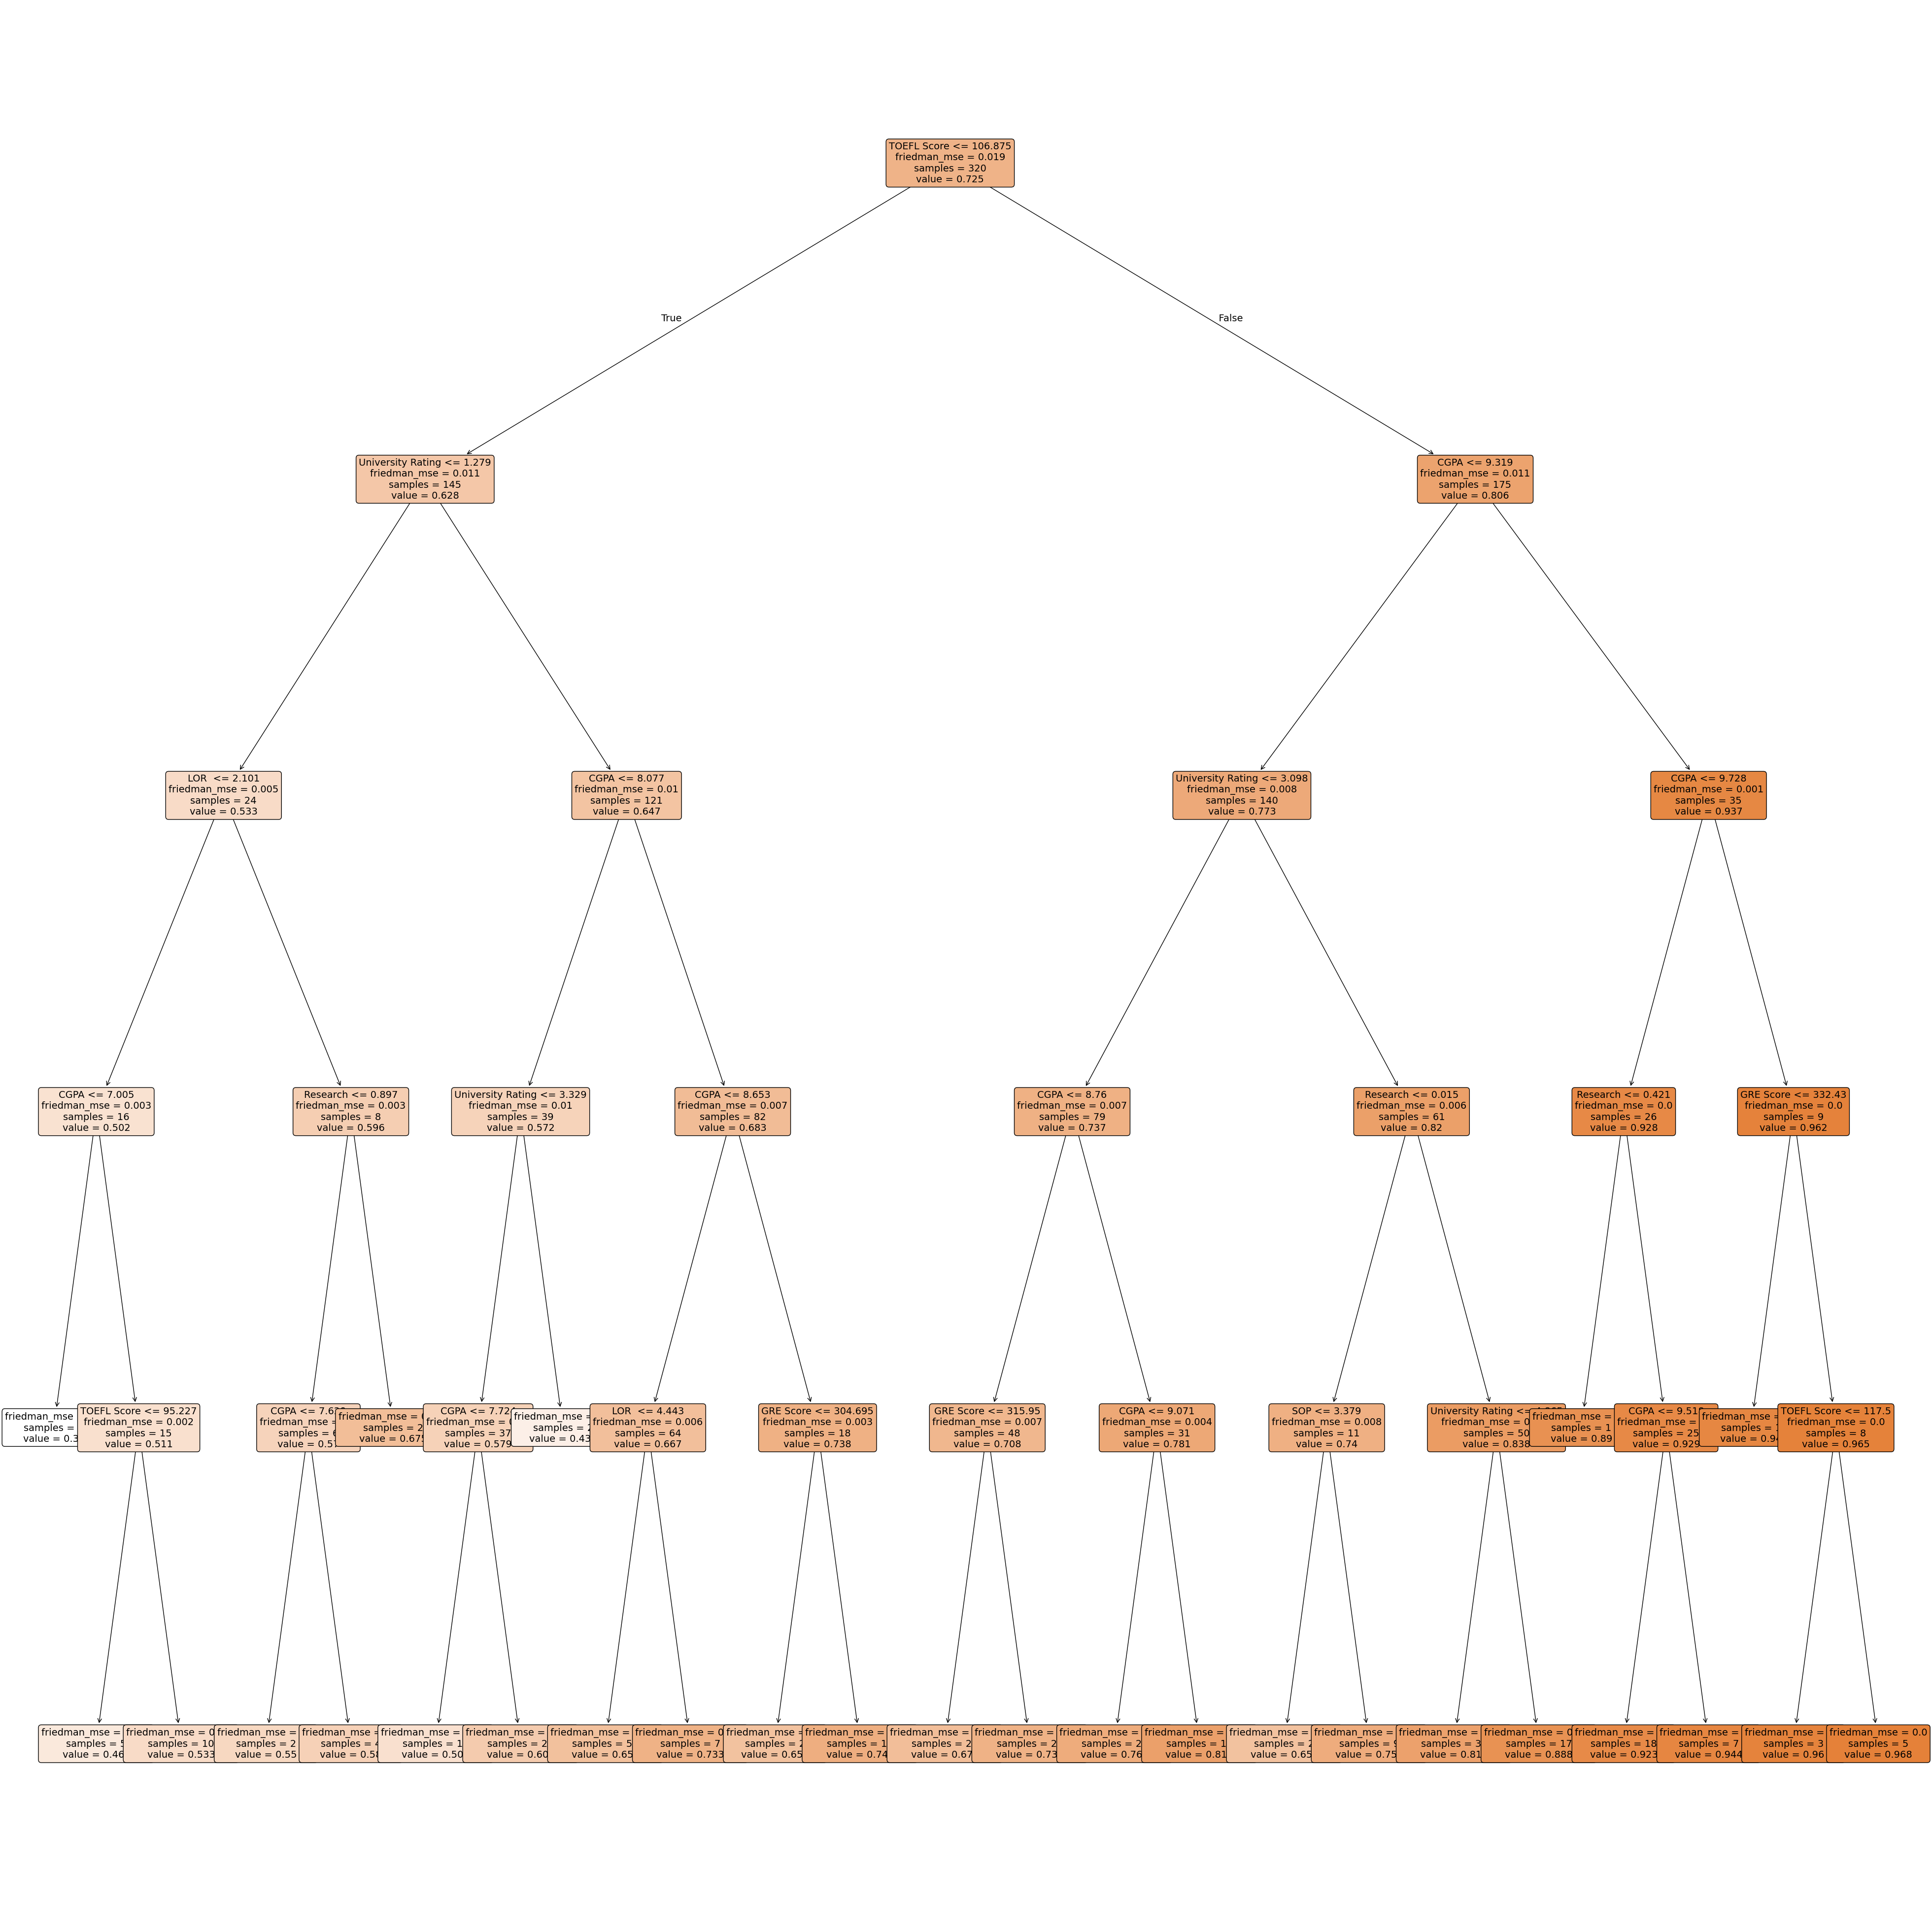

In [68]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=x.columns, #???
              class_names=y, #??
              filled=True,
              rounded=True,
              fontsize=14)

In [70]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT----------------------------------------------")
b1=best_model.predict(c)
print(b1)

--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT----------------------------------------------
[0.36]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [71]:
# Random Forest Regression Library

from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
# n_estimators = 100 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [72]:
y_rf=random_forest_reg.predict(x_test)
y_rf

array([0.6652, 0.7245, 0.9401, 0.8184, 0.5838, 0.9179, 0.5767, 0.4608,
       0.6788, 0.9065, 0.723 , 0.9394, 0.5179, 0.8991, 0.7219, 0.6711,
       0.7106, 0.4725, 0.7084, 0.9599, 0.6182, 0.6773, 0.7045, 0.5529,
       0.9441, 0.7998, 0.7313, 0.5765, 0.7095, 0.8072, 0.804 , 0.9429,
       0.6367, 0.4574, 0.7052, 0.6672, 0.7   , 0.6893, 0.632 , 0.9235,
       0.7489, 0.6423, 0.7598, 0.9492, 0.8791, 0.8403, 0.9645, 0.6548,
       0.9336, 0.8943, 0.9103, 0.7079, 0.7675, 0.9437, 0.5714, 0.5915,
       0.6902, 0.8427, 0.5731, 0.8762, 0.6411, 0.6468, 0.6788, 0.4532,
       0.6756, 0.6435, 0.6094, 0.8608, 0.8849, 0.7742, 0.6967, 0.821 ,
       0.9223, 0.8596, 0.5443, 0.7359, 0.6915, 0.5482, 0.8419, 0.7722])

In [73]:
print("--------------------Result for RF----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for RF----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [74]:
#evaluate
print("--------------------Result for LR----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
MSE: 0.004617003377285005
RMSE: 0.06794853476922813
MAE: 0.047956733620911976
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
MSE for DT: 0.009066250000000001
RMSE for DT: 0.09521685775113566
MAE for DT: 0.063625
R² Score for DT: 0.6489128363067596
--------------------Result for DT tuned----------------------------------------------
Test Score (R2): 0.7710543503475017
--------------------Result for RF not tuned----------------------------------------------
MSE for DT: 0.004994038499999999
RMSE for DT: 0.07066851137529359
MAE for DT: 0.04977500000000004
R² Score for DT: 0.8066077140670239


In [75]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6489128363067596
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7710543503475017
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239


In [76]:
import numpy as np
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT best parameters----------------------------------------------")
b1=best_model.predict(c)
print(b1)
print("--------------------Prediction with rf without tuning----------------------------------------------")
b2=random_forest_reg.predict(c)
print(b2)

--------------------Prediction with LR----------------------------------------------
[[-1.0972817]]
--------------------Prediction with DT best parameters----------------------------------------------
[0.36]
--------------------Prediction with rf without tuning----------------------------------------------
[0.4408]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


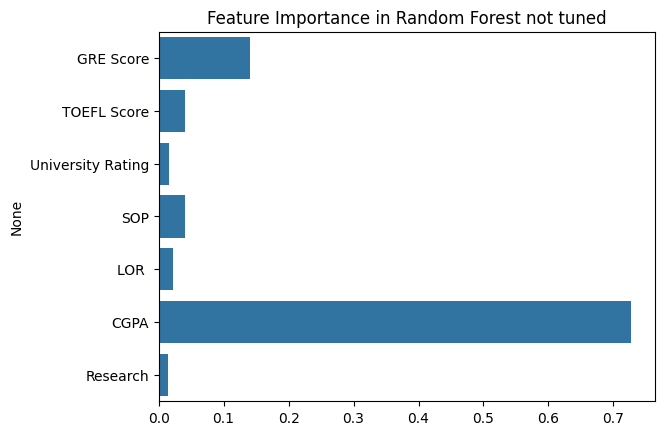

In [77]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest not tuned")
plt.show()

In [78]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg1 = RandomForestRegressor(n_estimators = 900, random_state = 42,max_depth=35, min_samples_split=20 )
# n_estimators = 900 --> Tree number
# random_state = 42  --> Sample number
random_forest_reg1.fit(x_train,y_train)
y_rf1=random_forest_reg1.predict(x_test)
print("--------------------Result for RF  tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--------------------Result for RF  tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


In [79]:
#evaluate
print("--------------------Result for LR----------------------------------------------")

print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for DT not tuned----------------------------------------------")

print("R² Score for DT:", r2_score(y_test, y_head_dtr))
print("--------------------Result for DT tuned----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2) for yuned DT :", test_score)

print("--------------------Result for RF not tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf))
print("--------------------Result for RF tuned----------------------------------------------")

print("R² Score for RF:", r2_score(y_test, y_rf1))

--------------------Result for LR----------------------------------------------
R² Score: 0.8212082591486993
--------------------Result for DT not tuned----------------------------------------------
R² Score for DT: 0.6489128363067596
--------------------Result for DT tuned----------------------------------------------
Test Score (R2) for yuned DT : 0.7710543503475017
--------------------Result for RF not tuned----------------------------------------------
R² Score for RF: 0.8066077140670239
--------------------Result for RF tuned----------------------------------------------
R² Score for RF: 0.8172557171306373


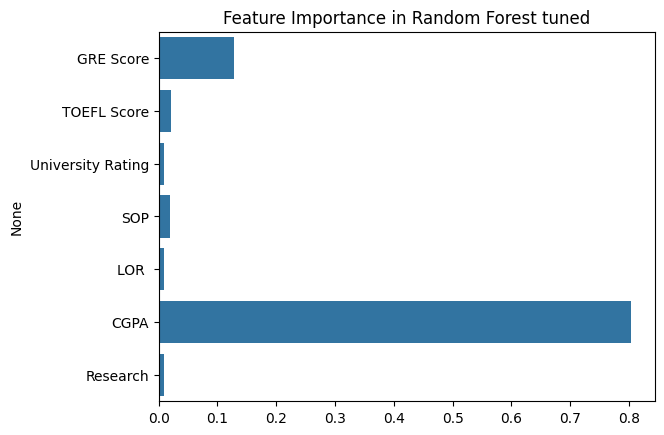

In [80]:
import seaborn as sns

# Get feature importance scores
importances = random_forest_reg1.feature_importances_
feature_names = x.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest tuned")
plt.show()

In [81]:
# Random forest tuned is the best model CPGA and TOFL score have the hightes impact to make an accurate predcition.

In [82]:
print("--------------------Prediction with rf without tuning----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b3=random_forest_reg1.predict(c)
print(b3)

--------------------Prediction with rf without tuning----------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[0.47711632]


In [84]:
import pickle
# Assume model is your trained ML model
with open('/content/drive/MyDrive/Atom Camp/Admission_Predict.csv', 'wb') as file: # Save to a specific directory
        pickle.dump(random_forest_reg1, file)


In [86]:
import pickle

# Example: Your trained model (replace with your own model)
model = 'random_forest_reg1'  # Dummy model, replace with your actual trained model

# Path to save the pickle file in Google Drive
model_path = '/content/drive/My Drive/Atom Camp/model.pkl'

# Save the model
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/Atom Camp/model.pkl
